# Setup

In [1]:
import os

from absl import logging

from pipeline.constants import PIPELINE_NAME

from tfx_helper.artifact_finder.local import NewestLocalPathGetter
from tfx_helper.artifact_finder.interface import ArtifactPathGetterInterface

from tfx_helper.visualization.confusion_matrix import plot_binary_classification_confusion_matrix
from tfx_helper.visualization.display_metrics import passed_validation, display_metrics, display_plots, get_slice_names
from tfx_helper.visualization.display_schema import display_schema
from tfx_helper.visualization.display_stats import display_stats, compare_stats
from tfx_helper.visualization.display_anomalies import display_anomalies
from tfx_helper.visualization.threshold_optimization import load_best_threshold
from tfx_helper.visualization.display_hyperparams import display_hyperparams

In [2]:
logging.set_verbosity(logging.DEBUG)

In [3]:
path_getter: ArtifactPathGetterInterface = NewestLocalPathGetter(
    artifact_dir=os.environ['PIPELINE_OUTPUT'], pipeline_name=PIPELINE_NAME
)

# Statistics of raw data

In [4]:
display_stats(path_getter('raw_stats_gen', 'statistics'), lhs_split='Split-train-cv-0')

DEBUG:absl:From 110 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/raw_stats_gen/statistics/1324' as newest


# Schema of raw data

In [5]:
display_schema(path_getter('raw_schema_gen', 'schema'))

DEBUG:absl:From 110 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/raw_schema_gen/schema/1325' as newest


,Type,Presence,Valency,Domain
Feature name,,,,
'Age',FLOAT,required,,-
'Cabin',BYTES,required,,-
'CryoSleep',STRING,required,,'CryoSleep'
'Destination',STRING,required,,'Destination'
'FoodCourt',FLOAT,required,,-
'HomePlanet',STRING,required,,'HomePlanet'
'Name',BYTES,required,,-
'PassengerId',INT,required,,-
'RoomService',FLOAT,required,,-


,Values
Domain,
'CryoSleep',"'False', 'True'"
'Destination',"'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'"
'HomePlanet',"'Earth', 'Europa', 'Mars'"
'Transported',"'False', 'True'"
'VIP',"'False', 'True'"


# Transformed data statistics

In [6]:
display_stats(path_getter('transformed_stats_gen', 'statistics'), lhs_split="Split-train-cv-0", rhs_split="Split-valid")

DEBUG:absl:From 30 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/transformed_stats_gen/statistics/1329' as newest


# Transformed data schema

In [7]:
display_schema(path_getter('transformed_schema_gen', 'schema'))

DEBUG:absl:From 22 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/transformed_schema_gen/schema/1332' as newest


,Type,Presence,Valency,Domain
Feature name,,,,
'bucketized_age',INT,required,,-
'bucketized_cabin_num',INT,required,,-
'bucketized_food_court',INT,required,,-
'bucketized_room_service',INT,required,,-
'bucketized_shopping_mall',INT,required,,-
'bucketized_spa',INT,required,,-
'bucketized_total_expenses',INT,required,,-
'bucketized_vr_deck',INT,required,,-
'cabin_deck_vocab',INT,required,,-


# Inference data anomalies

In [8]:
display_anomalies(path_getter('ExampleValidator', 'anomalies'), split_name='all')

DEBUG:absl:From 103 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/ExampleValidator/anomalies/1326' as newest


,Anomaly short description,Anomaly long description
Feature name,,
'Transported',Column dropped,Column is completely missing


# Inference data statistics

In [9]:
compare_stats(
    left_dir=path_getter('raw_stats_gen', 'statistics'), left_split="train-cv-0",
    right_dir=path_getter('inference_stats_gen', 'statistics')
)

DEBUG:absl:From 110 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/raw_stats_gen/statistics/1324' as newest
DEBUG:absl:From 110 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/inference_stats_gen/statistics/1323' as newest


# Best hyperparams

In [47]:
display_hyperparams(path_getter('Tuner', 'best_hyperparameters'))

DEBUG:absl:From 15 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Tuner/best_hyperparameters/1489' as newest


{'embedding_size': 32,
 'initial_learning_rate': 1e-05,
 'number_of_hidden_layers': 2,
 'first_hidden_layer_size': 1024,
 'activation': 'relu',
 'dropout': 0.0}

# Overall metrics

In [74]:
display_metrics(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:From 31 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/1584' as newest


SlicingMetricsViewer(config={'weightedExamplesColumn': 'example_count'}, data=[{'slice': 'Overall', 'metrics':…

# Metrics by home planet

In [24]:
display_metrics(path_getter('Evaluator', 'evaluation'), column='HomePlanet')

DEBUG:absl:From 10 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/890' as newest


SlicingMetricsViewer(config={'weightedExamplesColumn': 'example_count'}, data=[{'slice': 'HomePlanet:Europa', …

# Metrics by destination

In [13]:
display_metrics(path_getter('Evaluator', 'evaluation'), column='Destination')

DEBUG:absl:From 9 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/842' as newest


SlicingMetricsViewer(config={'weightedExamplesColumn': 'example_count'}, data=[{'slice': 'Destination:55 Cancr…

# Plots for overall slice

In [18]:
display_plots(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:From 20 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/1331' as newest


PlotViewer(config={'sliceName': 'Overall', 'metricKeys': {'calibrationPlot': {'metricName': 'calibrationHistog…

# Plots for Earthlings

In [15]:
display_plots(path_getter('Evaluator', 'evaluation'), slice_key={'HomePlanet': 'Earth'})

DEBUG:absl:From 9 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/842' as newest


PlotViewer(config={'sliceName': 'HomePlanet:Earth', 'metricKeys': {'calibrationPlot': {'metricName': 'calibrat…

# Plots for Martians

In [16]:
display_plots(path_getter('Evaluator', 'evaluation'), slice_key={'HomePlanet': 'Mars'})

DEBUG:absl:From 9 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/842' as newest


PlotViewer(config={'sliceName': 'HomePlanet:Mars', 'metricKeys': {'calibrationPlot': {'metricName': 'calibrati…

# Validation passed

In [75]:
passed_validation(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:From 31 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/1584' as newest


False

# Slices available

In [13]:
get_slice_names(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:From 20 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/1331' as newest


[(('VIP', 'False'),),
 (('CryoSleep', 'False'),),
 (('Destination', 'TRAPPIST-1e'),),
 (),
 (('HomePlanet', 'Earth'),),
 (('HomePlanet', 'Mars'),),
 (('Destination', '55 Cancri e'),),
 (('CryoSleep', 'True'),),
 (('HomePlanet', 'Europa'),),
 (('Destination', 'PSO J318.5-22'),),
 (('VIP', 'True'),)]

# Overall confusion matrix

In [76]:
best_threshold = load_best_threshold(path_getter('BinaryClassificationThresholdOptimizer', 'best_threshold'))
best_threshold

DEBUG:absl:From 28 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/BinaryClassificationThresholdOptimizer/best_threshold/1586' as newest


0.502

DEBUG:absl:From 31 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/1584' as newest
DEBUG:absl:For sought threshold 0.500000 found data with threshold 0.500000
DEBUG:absl:Confusion matrix counts [[614 129]
 [145 564]]
DEBUG:absl:Confusion matrix normalized [[0.82637954 0.17362046]
 [0.2045134  0.7954866 ]]


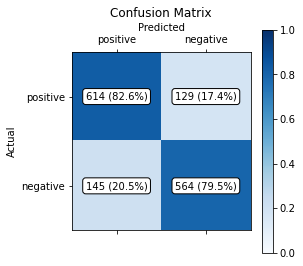

In [77]:
plot_binary_classification_confusion_matrix(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:From 31 subdirs selected '/tfx_pipeline_output/spaceshiptitanic/Evaluator/evaluation/1584' as newest
DEBUG:absl:For sought threshold 0.502000 found data with threshold 0.502000
DEBUG:absl:Confusion matrix counts [[613 130]
 [142 567]]
DEBUG:absl:Confusion matrix normalized [[0.82503365 0.17496635]
 [0.20028209 0.79971791]]


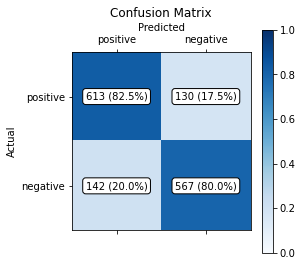

In [78]:
plot_binary_classification_confusion_matrix(path_getter('Evaluator', 'evaluation'), threshold=best_threshold)